**Судно** массой 1 тонна движется прямолинейно со скоростью 20 км/ч в спокойной воде. На полном ходу двигатель судна останавливается. Сопротивление воды пропорционально скорости движения судна и равно 1 тонне при скорости 1 км/ч ($k_{1} = 1$). Сопротивление воздуха пропорционально квадрату скорости движения судна и равно 5 тоннам при скорости 1 км/ч ($k_{2} = 5$). Другими внешними силами пренебречь. Определить:
1.   Скорость судна через 5 минут.
2.   Время, которое пройдет прежде чем скорость судна станет 5 км/ч.
3.   Расстояние в метрах, которое пройдет судно в течение часа.

Скорость через 5 минут: 2.05 км/ч
Время, когда скорость станет 5 км/ч: 0.03 часов
Пройденное расстояние за 1 час: 0.83 км


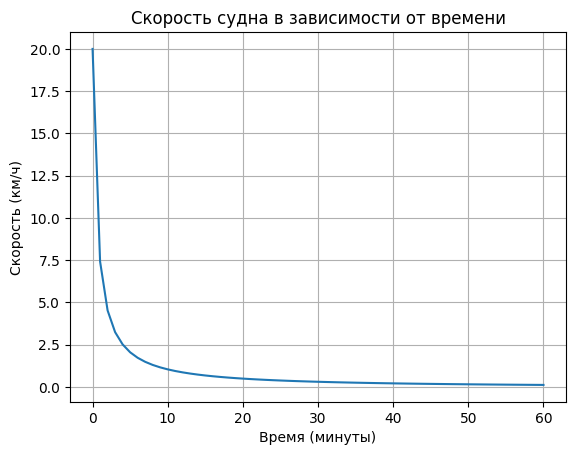

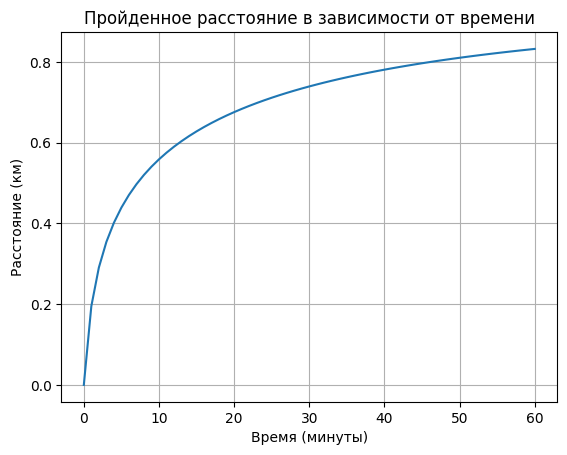

In [2]:
import sympy as sp
import matplotlib.pyplot as plt

t = sp.symbols('t')
v = sp.Function('v')(t)
v0 = 20
m = 1
k1 = 1
k2 = 5

eq = sp.Eq(m * v.diff(t), - (k1 * v + k2 * v**2))

sol = sp.dsolve(eq, v, ics={v.subs(t, 0): v0})

v_t = sp.simplify(sol.rhs)

v_5_min = v_t.subs(t, 5 / 60).evalf()

t_for_v_5 = sp.solve(sp.Eq(v_t, 5), t)
t_for_v_5_num = [val.evalf() for val in t_for_v_5]

distance = sp.integrate(v_t, (t, 0, 1)).evalf()

print("Скорость через 5 минут: {:.2f} км/ч".format(v_5_min))
print("Время, когда скорость станет 5 км/ч: {:.2f} часов".format(t_for_v_5_num[0]))
print("Пройденное расстояние за 1 час: {:.2f} км".format(distance))


t_vals = [i / 60 for i in range(61)]
v_vals = [v_t.subs(t, val).evalf() for val in t_vals]

plt.plot([val * 60 for val in t_vals], v_vals)
plt.title('Скорость судна в зависимости от времени')
plt.xlabel('Время (минуты)')
plt.ylabel('Скорость (км/ч)')
plt.grid(True)
plt.show()

distance_vals = [sp.integrate(v_t, (t, 0, val)).evalf() for val in t_vals]

plt.plot([val * 60 for val in t_vals], distance_vals)
plt.title('Пройденное расстояние в зависимости от времени')
plt.xlabel('Время (минуты)')
plt.ylabel('Расстояние (км)')
plt.grid(True)
plt.show()